# 뉴럴 네트워크 다중 선형회귀

- auto-mpg(연비) dataset

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [54]:
tf.__version__

'2.14.0'

In [55]:
# !pip install tensorflow==2.14

### 1. 데이터준비


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df = pd.read_csv("/content/drive/MyDrive/SKT FLY AI/2주차/DNN/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [59]:
df['horsepower'].unique() # ?를 가진 row를 날려야함.

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [60]:
df = pd.read_csv("/content/drive/MyDrive/SKT FLY AI/2주차/DNN/auto-mpg.csv", na_values=['?'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [63]:
df.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [64]:
X = df[['cylinders','displacement','horsepower','weight','acceleration','model year']]
y = df.mpg

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_train.shape, y_train.shape

((313, 6), (313,))

* 스케일링

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[ 1.51040727,  1.07508267,  1.25238452,  0.54139086, -1.30971783,
        -1.69540513],
       [-0.86227768, -0.93225674, -0.40975295, -1.00783493, -0.40324852,
        -1.69540513],
       [-0.86227768, -0.99044049, -0.94592632, -1.13267661,  0.93832606,
         1.6614434 ],
       ...,
       [-0.86227768, -0.57345694, -0.22209226, -0.55008211, -0.2944722 ,
         0.54249389],
       [-0.86227768, -1.00983508, -1.10677834, -1.1029524 ,  0.61199711,
         1.38170602],
       [-0.86227768, -0.93225674, -1.53571704, -1.22184924,  1.95357168,
        -0.85619299]])

In [69]:
y_train = y_train.values

### 4. 모델 구성

In [70]:
from tensorflow import keras
from keras import layers

In [71]:
model = keras.Sequential([
    layers.Dense(units = 6,activation="relu",input_shape=(6,)),
    layers.Dense(units = 3,activation="relu"),
    layers.Dense(units = 1)
])


In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* 모델 컴파일
  * 손실 함수 결정
  * 옵티마이저(경사하강법) 기법 선택
  * 매트릭스 (MAE,MSE 등)

In [73]:
model.compile(
    loss='mse',
    optimizer='adam',
    metrics = ['mse','mae']
)

* 학습

In [74]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
    X_train_s,y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    verbose = 1  # log
)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 682.3655 - mse: 682.3655 - mae: 24.8121
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 667.8704 - mse: 667.8704 - mae: 24.5329
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 655.5486 - mse: 655.5486 - mae: 24.2964
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 645.2249 - mse: 645.2249 - mae: 24.0985
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 636.6075 - mse: 636.6075 - mae: 23.9318
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 629.0718 - mse: 629.0718 - mae: 23.7862
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 622.3301 - mse: 622.3301 - mae: 23.6555
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 616.0979 - mse: 616.0979 - mae: 23.5335
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 610.2514 - mse: 610.251

### 5. 평가

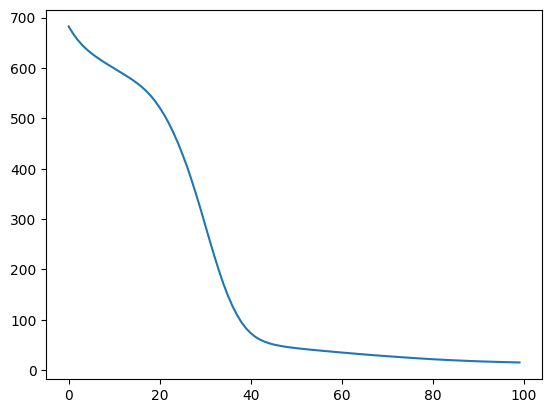

In [77]:
hist = history.history
epoch = history.epoch

plt.plot(epoch,hist['loss'],label = 'loss')
plt.show()

In [80]:
X_test.isna().sum()

cylinders       0
displacement    0
horsepower      1
weight          0
acceleration    0
model year      0
dtype: int64

In [84]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]

X_test.shape , y_test.shape

((79, 6), (79,))

In [85]:
X_test_s = scaler.transform(X_test)

In [86]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 3ms/step


In [91]:
X_test.shape, y_pred.shape

((79, 6), (79, 1))

In [88]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

12.35525116240343

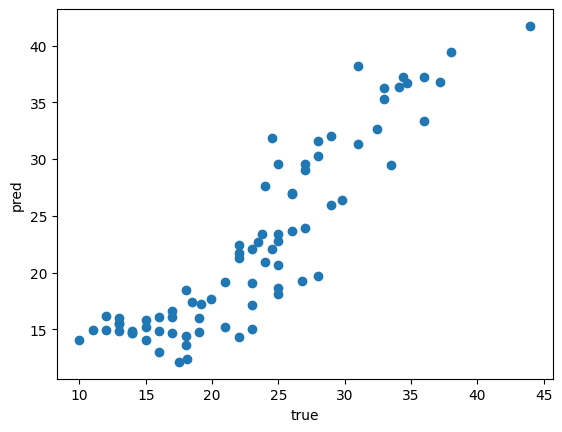

In [90]:
plt.scatter(y_test,y_pred)
plt.xlabel('true')
plt.ylabel('pred')
plt.show()